# Project: Classification - Hotel Booking Cancellation Prediction

## Marks: 30

Welcome to the project on classification. We will use the INN Hotels dataset for this problem.

## Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers' booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

## Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


## Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and overview of the dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#To tune the model
from sklearn.model_selection import GridSearchCV

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#### Loading data

In [2]:
saved_path = '/content/INNHotelsGroup.csv'
hotel = pd.read_csv(saved_path)

In [3]:
# copying data to another variable to avoid any changes to original data
data = hotel.copy()

#### View the first and last 5 rows of the dataset

In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


#### Check the info of the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* The dataset has **36,275 rows and 19 columns**. 

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of **object type** while rest columns are numeric in nature.

* There are **no null values** in the dataset.

* **Booking_ID column is an identifier**. Let's check if each entry of the column is unique.

In [7]:
data.Booking_ID.nunique()

36275

**Observations:**
- We can see that **all the entries of this column are unique**. Hence, this column would not add any value to our analysis. 
- Let's drop this column.

#### Dropping the Booking_ID column

In [8]:
data = data.drop(["Booking_ID"], axis=1)

In [9]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Exploratory Data Analysis

#### Summary Statistics for numerical columns

#### Question 1: Write the observations from the below summary statistics (2 Marks)

In [ ]:
#Selecting numerical columns and checking summary statistics
num_cols = data.select_dtypes('number').columns

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


**Observations:**

- Examining the max values relative to the upper whiskers (75%ile + 1.5xIQR), there appear to be significant outliers on the higher end of the upper whiskers for the variables no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests.  In some of these cases, there might be errors in data entry on the high side (max values).
- On average, there do not appear to be a low number/fraction (<< 1) repeated guests and no of previous cancellations.  There is also a low average number of previous bookings not canceled and a low average number of special requests.
- A majority of people checkin for 2 adults and 0 children. 
- The median number of weekend nights is 1 and the median number of weekday nights is 2.     
- Since the mean is greater than median for both lead_time and average_price_per_room, both of these continuous variables appear to be positively skewed.  

In [10]:
#Checking the rows where avg_price_per_room is 0
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- In the market segment column, it looks like **many values are complementary**. Let's check the market segment where the room prices are equal to 0.

In [11]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

* It makes sense that most values with room prices equal to 0 are the rooms given as complimentary service given by the hotel.
* The rooms booked online might be a part of some promotional campaign done by the hotel. We will not treat these rows as we don't have the data to test this claim.

#### Check the distribution and outliers for some columns in the data

lead_time
Skew : 1.29


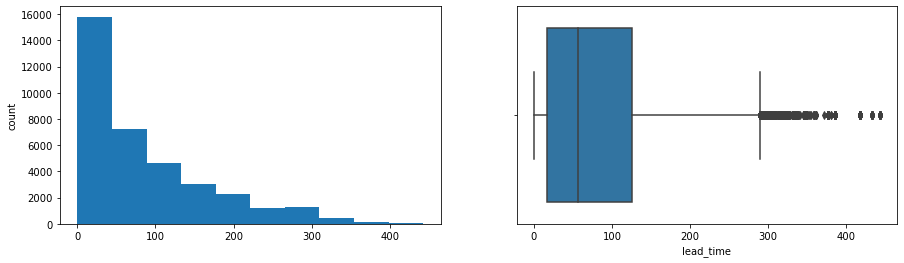

no_of_previous_cancellations
Skew : 25.2


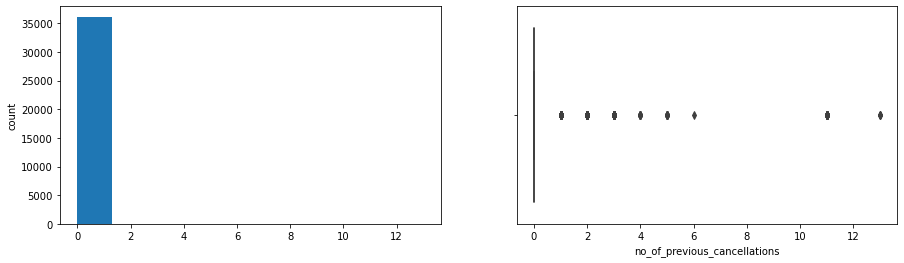

no_of_previous_bookings_not_canceled
Skew : 19.25


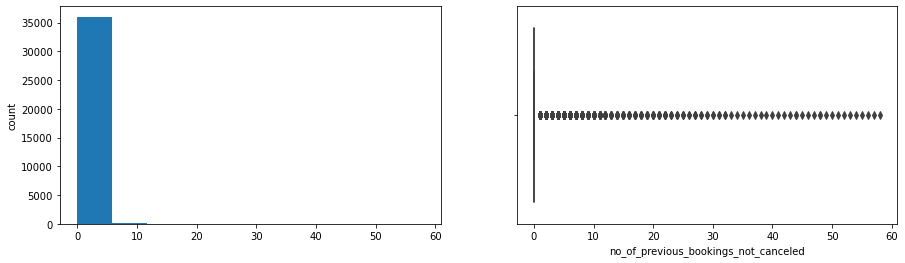

avg_price_per_room
Skew : 0.67


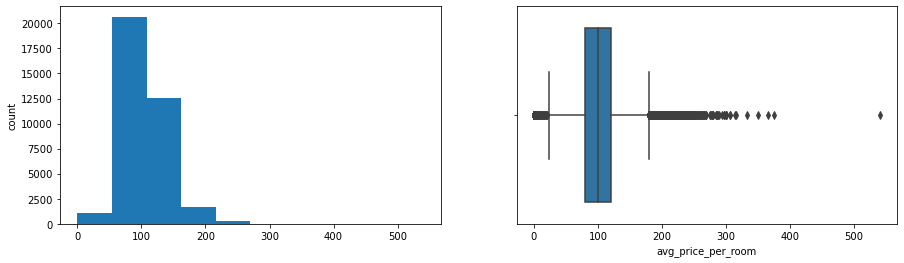

In [ ]:
for col in ['lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

- The distribution of **lead time is right-skewed**. Many customers have made the booking on the same day of arrival as well. There are many outliers, **some customers made booking more than 400 days in advance**. 
- **Very few customers have more than one cancellation**. Some customers canceled more than 12 times.
- **Very few customers have more than 1 booking not canceled previously**. Some customers have not canceled their bookings around 60 times.
- **The distribution of average price per room is skewed to right**. There are outliers on both sides. The median price of a room is around ~100 euros. There is 1 observation where the average price of the room is more than 500 euros. This observation is quite far away from the rest of the values. We can treat this by clipping the value to the upper whisker (Q3 + 1.5 * IQR).

In [12]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [13]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### Now, let's check percentage of each category for some variables

#### Question 2: 

- **Write the code to check the percentage of each category for columns mentioned below (cat_cols) (2 Marks)**
- **Write your observations (2 Marks)**

In [18]:
cat_cols = ['no_of_adults', 'no_of_children', 'no_of_week_nights', 'no_of_weekend_nights', 'required_car_parking_space', 
        'type_of_meal_plan', 'room_type_reserved', 'arrival_month', 'market_segment_type', 'no_of_special_requests', 
        'booking_status']

#Write your code here

for col in cat_cols:
  print(data[col].value_counts(normalize=True))
  print("-" * 15)

2    0.719724
1    0.212130
3    0.063873
0    0.003832
4    0.000441
Name: no_of_adults, dtype: float64
---------------
0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64
---------------
2     0.315479
1     0.261558
3     0.216099
4     0.082426
0     0.065803
5     0.044493
6     0.005210
7     0.003115
8     0.001709
10    0.001709
9     0.000937
11    0.000469
15    0.000276
12    0.000248
14    0.000193
13    0.000138
17    0.000083
16    0.000055
Name: no_of_week_nights, dtype: float64
---------------
0    0.465114
1    0.275534
2    0.250062
3    0.004218
4    0.003556
5    0.000937
6    0.000551
7    0.000028
Name: no_of_weekend_nights, dtype: float64
---------------
0    0.969014
1    0.030986
Name: required_car_parking_space, dtype: float64
---------------
Meal Plan 1     0.767333
Not Selected    0.141420
Meal Plan 2     0.091110
Meal Plan 3     0.000138
Name: type_of_meal_plan, dtype: float64
------

**Observations:**

- The majority proportions in each category are as follows: ~72% check in as two adults, ~93% check in with no children, ~80% check in for between 1-3 week nights, ~46% check in for no weekend nights and ~28% check in for 1 weekend night, ~97% do not require car parking space, ~77% selected Meal Plan 1 (breakfast), ~78% selected Room Type 1, ~39% check in between months 8-10 (Aug-Oct) the highest being in Oct, ~64% are from the Online market segement type, ~55% had no special requests and ~31% had 1 special request.
- As for the output (dependent) variable (booking_status), ~67% did not cancel and about ~33% canceled. Thus, the data set is imbalanced in terms of the output (dependent) variable.  

**Replacing values 9 and 10 for the number of children with 3 and encoding the target variable**

In [19]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

In [20]:
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Let's check the relationship of market segment type with the average price per room.

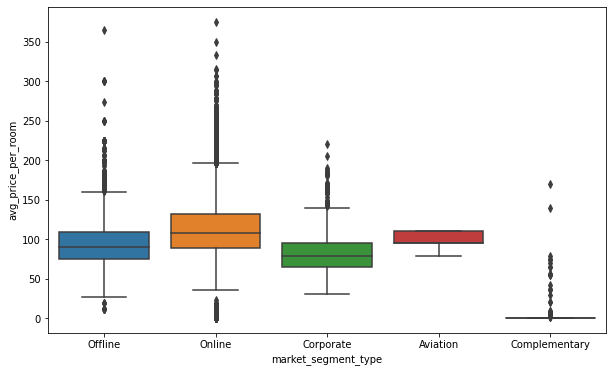

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="market_segment_type", y="avg_price_per_room")
plt.show()

* **Rooms booked online have the highest variations in prices.**
* The distribution for offline and corporate room prices are almost similar except for some outliers.
* Complementary market segment gets the rooms at very low prices, which makes sense.

**Let's see how booking status varies across different market segments. Also, how lead time impacts booking status**

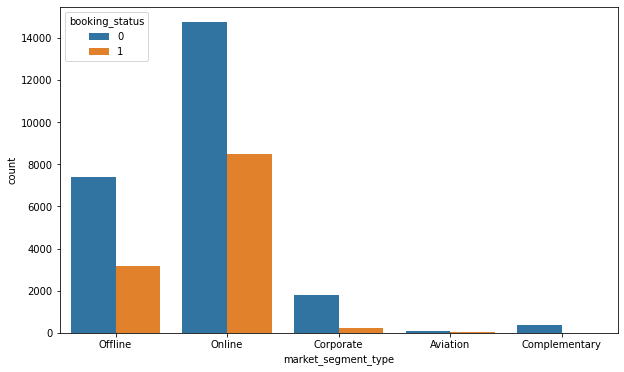

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment_type', hue='booking_status', data=data)
plt.show()

* **Online bookings have the highest number of cancellations.**
* Bookings made offline are less prone to cancellations.
* Corporate and complementary segment shows very low cancellations.

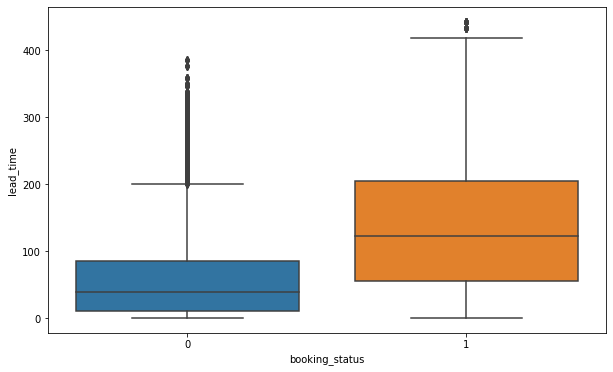

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="booking_status", y="lead_time")
plt.show()

* There's a big difference in the median value of lead time for bookings that were canceled and bookings that were not canceled. **The higher the lead time higher is the chances of a booking being canceled.**

**Now, let's check how the arrival month impacts the booking status**

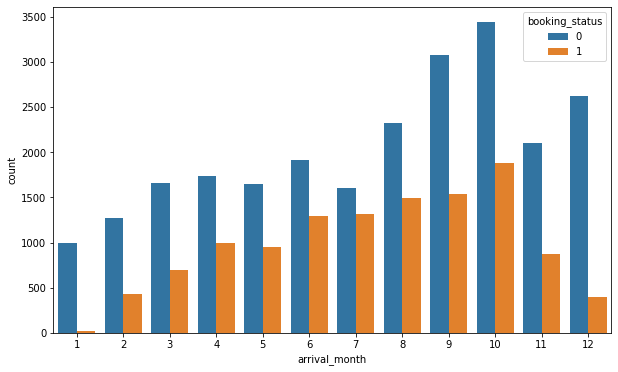

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_month', hue='booking_status', data=data)
plt.show()

- We observed earlier that the month of October has the highest number of bookings but the above plot shows that **October has the highest number of cancellations** as well.
- Bookings made for **December and January are less prone to cancellations**.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

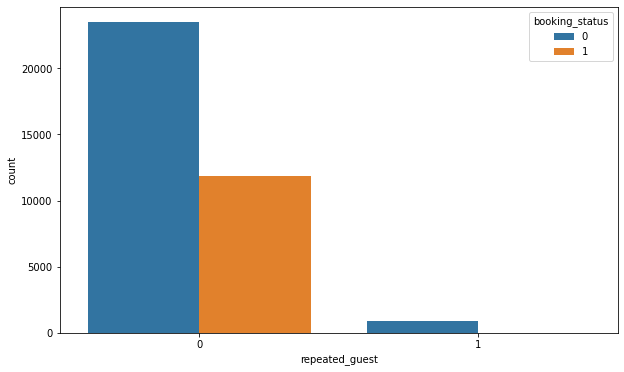

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='repeated_guest', hue='booking_status', data=data)
plt.show()

* There are **very few repeat customers but the cancellation among them is very less**. This is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.

**We have explored different combinations of variables. Now, let's see the pairwise correlations between all the variables.**

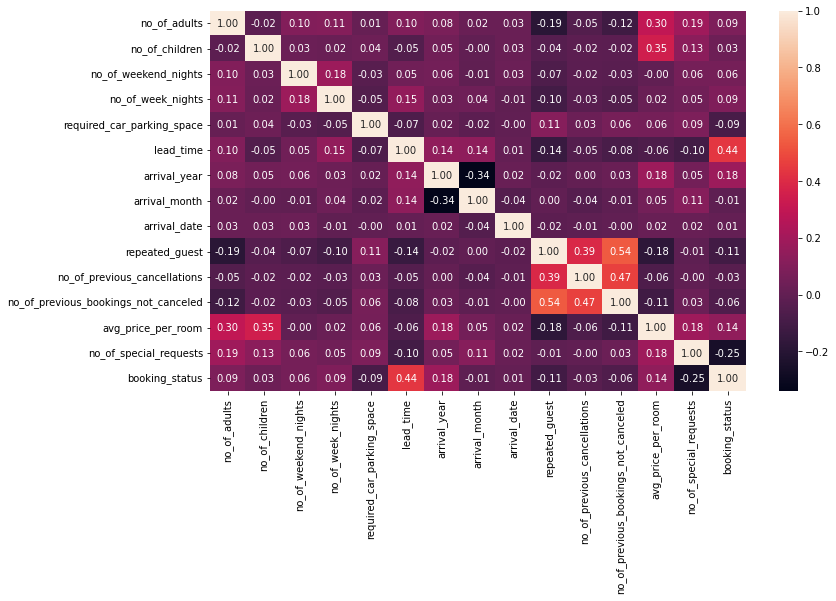

In [26]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

* There's a **positive correlation between the number of customers (adults and children) and the average price per room**. This makes sense as more the number of customers more rooms they will require thus increasing the cost.
* There's a **negative correlation between average room price and repeated guests**. The hotel might be giving some loyalty benefits to the customers.
* **Repeated guests have a positive correlation with the number of previous bookings canceled and previous bookings not canceled.** This implies that repeated customers are also likely to cancel their bookings.  
* There's a positive correlation between lead time and the number of weeknights a customer is planning to stay in the hotel.
* There's a **positive correlation between booking status and lead time**, indicating higher the lead time higher are the chances of cancellation.
* There's a negative correlation between the number of special requests from the customer and the booking status, indicating **if a customer has made some special requests the chances of cancellation might decrease**

**Now that we have explored our data, let's prepare it for modeling.**

## Preparing data for modeling

- Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables.
- We will then split the data into train and test sets.

#### Question 3: 

- **Drop the target variable from the original data and store it in a separate dataframe `X` (1 Mark)**
- **Store the target variable in a separate series `Y` (1 Mark)**

In [27]:
#Remove the blanks and complete the below code
X=data.drop(columns=['booking_status'], inplace=False)
Y=data['booking_status']

In [28]:
#Creating dummy variables 
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first=True)

In [29]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=1)

## Building Classification Models

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem on hand.**

### Model evaluation criterion

#### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

#### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of unsold rooms. The hotel might also have to bear an additional cost of advertising the room again on different distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 


#### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1 score higher are the chances of minimizing False Negatives and False Positives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [30]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression

#### Question 4: Fit the logistic regression model on the train dataset using random_state=1 (2 Marks)

In [32]:
#define logistic regression model 
log_reg= LogisticRegression(random_state=1) #write your code here

#fit the model
log_reg.fit(X_train, y_train) #write you code here

LogisticRegression(random_state=1)

**Let's check the coefficient of each dependent variable in the data**

#### Question 5: Write your observations on the below coefficients obtained from the logistic regression model (3 Marks)

In [ ]:
pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(ascending=False)

market_segment_type_Online              0.624071
type_of_meal_plan_Not Selected          0.321587
no_of_weekend_nights                    0.180871
avg_price_per_room                      0.019686
lead_time                               0.015407
no_of_adults                            0.011404
no_of_week_nights                       0.006240
arrival_date                            0.001224
type_of_meal_plan_Meal Plan 3           0.000400
room_type_reserved_Room_Type 3          0.000341
arrival_year                           -0.001730
room_type_reserved_Room_Type 2         -0.004286
market_segment_type_Complementary      -0.008782
room_type_reserved_Room_Type 5         -0.011135
room_type_reserved_Room_Type 7         -0.017821
no_of_previous_cancellations           -0.024671
market_segment_type_Corporate          -0.031280
room_type_reserved_Room_Type 4         -0.032748
repeated_guest                         -0.043413
room_type_reserved_Room_Type 6         -0.045607
no_of_children      

**Observations:**

- Assuming all parameters of the model are significant (p < 0.05), and all else being constant, online market segment type of reservations are more likely than not to have cancelations. 
- Similarly, if the type of meal plan is not selected, there are greater chances of cancelation. 
- Greater the number of weekend nights, greater the likelihood of cancelation. 
- Greater the avg price per room and greater the lead time, greater the chances of cancelations. 
- Greater the number of adults or number of week nights, greater the chances of cancelation. 
- Conversely, greater the number of special requests and required car parking space, lower the chances of cancelation.
- The offline market segment type is less likely to have cancelations. 
- Greater the number of bookings not canceled and greater the no of previous cancellations, lower the chances of cancelation.

#### Question 6: Write your interpretations of the odds calculated from the logistic regression model coefficients (3 Marks)

In [ ]:
odds = np.exp(log_reg.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

,odds
market_segment_type_Online,1.866510
type_of_meal_plan_Not Selected,1.379315
no_of_weekend_nights,1.198261
avg_price_per_room,1.019881
lead_time,1.015527
no_of_adults,1.011469
no_of_week_nights,1.006260
arrival_date,1.001225
type_of_meal_plan_Meal Plan 3,1.000400
room_type_reserved_Room_Type 3,1.000341


**Observations:**

- Since these odds are derived from the coefficients, they tell much the same story regarding the likelihood of cancelation as do the coefficients themselves.  
- Odds greater than 1 imply that it is more likely than not that a cancelation will occur.
- Odds lower than 1 imply that it is less likely than not that a cancelation will occur.
- For example, all else being equal, the odds of cancelation are ~1.9 for the online market segment type, the odds of cancelation are ~1.4 for type of meal plan not selected. 
- Conversely, the odds of cancelation are low (~0.2) if a number of special requests are made or for the offline market segment type.      

**Now, let's check the performance of the model on the training set**

#### Question 7: Check the performance on the training data and write your observations from the classification report and confusion matrix for the training set (3 Marks)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86     17029
           1       0.74      0.61      0.67      8363

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.80      0.80      0.79     25392



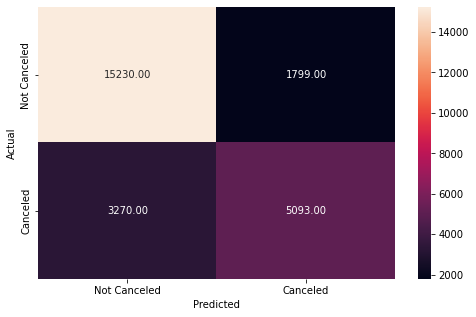

In [38]:
# Checking performance on the training data
y_pred_train = log_reg.predict(X_train)
metrics_score(y_train, y_pred_train)

**Reading confusion matrix (clockwise):**

- **True Positive**: Predicting the customer will not cancel the booking and the customer does not cancel the booking
- **False Negative**: Predicting the customer will cancel the booking but the customer does not cancel the booking
- **True Negative**: Predicting the customer will cancel the booking and the customer cancels the booking
- **False Positive**: Predicting the customer will not cancel the booking but the customer cancels the booking

**Observations:**

- TP (no of non-cancelations correctly identified): 15230
- FN (no of non-cancelations incorrectly identified): 1799
- TN (no of cancelations correctly identified): 5093
- FP (no of cancelations incorrectly identified): 3270

- Total correct decisions: TP + TN = 20323
- Total errors: FN + FP = 5069

- Overall Accuracy = ~80%
- Overall F1-score = ~76-79%

**Precision-Recall Curve for Logistic Regression**

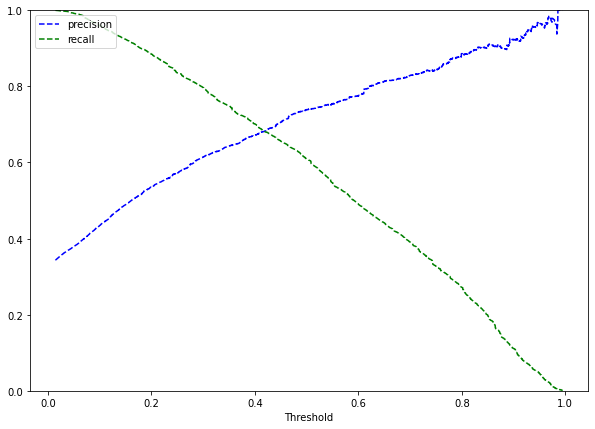

In [39]:
y_scores=log_reg.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observations:**
- We can see that **precision and recall are balanced for the threshold of about 0.4.**
- Let's try to calculate the exact threshold where precision and recall are equal.

In [40]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds)):
    if precisions[i]==recalls[i]:
        print(thresholds[i])

- The threshold of 0.42 would give a balanced precision and recall.

#### Question 8: Compare the performance of the model on training and testing sets after changing the threshold (2 Marks)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     17029
           1       0.68      0.68      0.68      8363

    accuracy                           0.79     25392
   macro avg       0.76      0.76      0.76     25392
weighted avg       0.79      0.79      0.79     25392



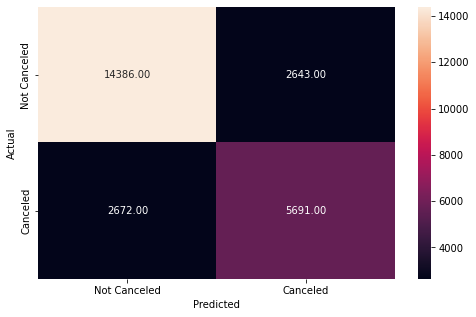

In [41]:
optimal_threshold1 = 0.42
metrics_score(y_train, y_scores[:,1]>optimal_threshold1)

**Let's check the performance of the model on the test data**

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7361
           1       0.68      0.68      0.68      3522

    accuracy                           0.79     10883
   macro avg       0.77      0.77      0.77     10883
weighted avg       0.79      0.79      0.79     10883



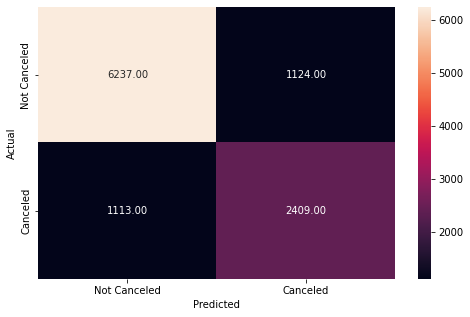

In [42]:
#Checking performance on the testing data
y_pred_test = log_reg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observations:**

- TP (no of non-cancelations correctly identified): 6237
- FN (no of non-cancelations incorrectly identified): 1124
- TN (no of cancelations correctly identified): 2409
- FP (no of cancelations incorrectly identified): 1113

- Total correct decisions: TP + TN = 8646
- Total errors: FN + FP = 2237

- Overall Accuracy = ~79% (roughly the same as the accuracy of the training dataset)
- Overall F1-score = ~77-79% (roughly the same as the accuracy of the training dataset)

### K - Nearest Neighbors (KNN)

- KNN is a distance based algorithm and all distance based algorithms are affected by the scale of the data.
- We will scale the attributes (dataframe X defined above) before building the KNN model.
- Then We need to identify the value of K to be used in KNN. We will use **GridSearchCV** to find the optimal value of K along with other hyperparameters.

In [43]:
# scaling the data
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)  #fit_transform the training data
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns) #transform the testing data

### Using GridSearchCV for find the value of K and hyperparameter tuning

**Points to note:**

* Hyperparameter tuning is tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation.
* **Grid search** is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* Grid search is an exhaustive search of values that tries many iterations to compute the optimum values of hyperparameters. So, **it might take up to 30 minutes for the code to run depending on the number of values and hyperparameters passed.**  
* The hyperparameters that we are tuning are:

    - **n_neighbors**: Number of neighbors to use.

    - **weights={'uniform', 'distance'}**
        - uniform : uniform weights. All points in each neighborhood are weighted equally.
        - distance : weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors that are further away.

    - **p**: When p = 1, this is equivalent to using Manhattan_distance (L1), and Euclidean_distance (L2) is used for p = 2.

In [44]:
knn = KNeighborsClassifier()

params_knn = {'n_neighbors':np.arange(2,20,2), 'weights':['uniform','distance'], 'p':[1,2]}

grid_knn = GridSearchCV(estimator=knn, param_grid=params_knn, scoring='f1', cv=10)

model_knn=grid_knn.fit(X_train_scaled,y_train)

knn_estimator = model_knn.best_estimator_
print(knn_estimator)

KNeighborsClassifier(n_neighbors=14, p=1, weights='distance')


#### Question 9: 

- **Fit the KNN model on the scaled training data using the optimal values of hyperparameters obtained from GridSearchCV (1 mark)**
- **Check the performance of the model on the scaled training and testing sets (2 Marks)**
- **Compare the performance and write your observations (1 Marks)**

In [45]:
#Fit the KNN model on the scaled training data
knn = KNeighborsClassifier(n_neighbors=14, p=1, weights='distance')

knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=14, p=1, weights='distance')

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17029
           1       1.00      0.99      0.99      8363

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



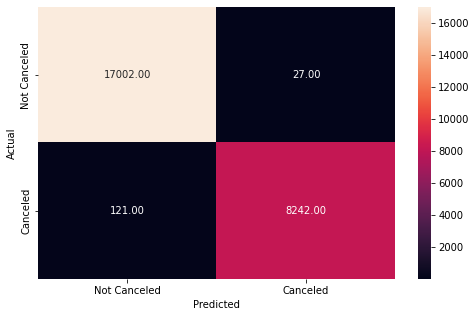

In [46]:
#Make predictions on the scaled training data and check the performance (using metrics_score function)

y_pred_train = knn.predict(X_train_scaled) 
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7361
           1       0.82      0.78      0.80      3522

    accuracy                           0.87     10883
   macro avg       0.86      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



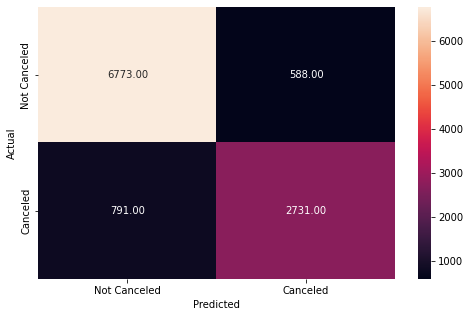

In [47]:
#Make predictions on the scaled testing data and check the performance (using metrics_score function)
y_pred_test = knn.predict(X_test_scaled)
metrics_score(y_test, y_pred_test)

**Observations:**

**On training data:**

- TP (no of non-cancelations correctly identified): 17002
- FN (no of non-cancelations incorrectly identified): 27
- TN (no of cancelations correctly identified): 8242
- FP (no of cancelations incorrectly identified): 121

- Total correct decisions: TP + TN = 25244
- Total errors: FN + FP = 148

- Overall Accuracy = ~99% (significantly better than using logistic regression, likely the model is overfit to the training dataset)
- Overall F1-score = ~99% (significantly better than using logistic regression)

**On test dataset:**

- TP (no of non-cancelations correctly identified): 6773
- FN (no of non-cancelations incorrectly identified): 588
- TN (no of cancelations correctly identified): 2731
- FP (no of cancelations incorrectly identified): 791

- Total correct decisions: TP + TN = 9504
- Total errors: FN + FP = 1379

- Overall Accuracy = ~87% (significantly better than with logisitic regression, but much worse than for the training dataset).
- Overall F1 score = ~85-87% (significantly better than with logisitic regression, but much worse than for the training dataset).


#### Question 10: Write the conclusion on the key factors that are driving the approval of loan and write your recommendations to the business on how can they minimize the number of cancellations. (5 Marks)

### Conclusion:

Write your conclusion here

- The KNN model outperforms the Logistic Regression model in terms of performance (accuracy and F1-score). However, the Logistic Regression model is more interpretable, since the effect of various factors (variables) on the likelihood of cancelation can be determined from the p-values and coefficients of the logisitic regression model.  
- Based on the correlation matrix, there's a positive correlation between booking status and lead time, indicating higher the lead time higher are the chances of cancellation. This is consistent with the logisitic regression model coefficients. 
- There's a negative correlation between the number of special requests from the customer and the booking status, indicating if a customer has made some special requests the chances of cancellation might decrease.  This is consistent with the logisitic regression model coefficients.
- There's a positive correlation between the number of customers (adults and children) and the average price per room. This makes sense as more the number of customers more rooms they will require thus increasing the cost.
- There's a negative correlation between average room price and repeated guests. The hotel might be giving some loyalty benefits to the customers.
- Repeated guests have a positive correlation with the number of previous bookings canceled and previous bookings not canceled. This implies that repeated customers are also likely to cancel their bookings.
- There's a positive correlation between lead time and the number of weeknights a customer is planning to stay in the hotel.
  

### Recommendations:

Write your recommendations here

- For better accuracy and F1-score of prediction as to whether a customer is likely to cancel a booking or not, use the KNN model over the logisitic regression model.  
- On the other hand, using the model coefficients from the logisitic regression model, certain intuition can be obtained as to the factors that are likely to result in higher likelihood of cancelations. 
- Assuming that all parameters of the logistic regression model are significant (p < 0.05), and all else being constant, online market segment type of reservations are more likely than not to have cancelations.
- Similarly, if the type of meal plan is not selected, there are greater chances of cancelation.
- Greater the number of weekend nights, greater the likelihood of cancelation.
- Greater the avg price per room and greater the lead time, greater the chances of cancelations.
- Greater the number of adults or number of week nights, greater the chances of cancelation.
- Conversely, greater the number of special requests and required car parking spaces, lower the chances of cancelation.
- The offline market segment type is less likely to have cancelations.
- Greater the number of bookings not canceled and greater the no of previous cancellations, lower the chances of cancelation.